<a href="https://colab.research.google.com/github/HardeepSaggu/MNIST/blob/master/Digit_Classification_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Classifier (MNIST Dataset)**

**Importing necessary libraries and modules**

---

In [0]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn import svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

  ---

**Importing MNIST Digit recognition dataset which is implicitly installed in sklearn.datasets**


---



In [0]:
mnist = fetch_openml('mnist_784')

---

**Checking shape (rows and columns) in our dataset**


> Our dataset consists of 70000 rows and 784 columns


> 784 columns indicates 28 x 28 pixel images flattened into one vector


> Each value in the given vector corresponds to grayscale value at that point in the image







In [4]:
mnist.data.shape

(70000, 784)

---

**Splitting dataset into train and test**


> Test size = 1/7 of 70,000 images or 10,000 images

> Train size = 60,000 images

---





In [0]:
train_img,test_img,train_label,test_label = train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

**Verifying the shape of our training and test data**

---

In [6]:
print (train_img.shape)
print (test_img.shape)

(60000, 784)
(10000, 784)


**Visualizing few images to help us understand what we are dealing with**

---

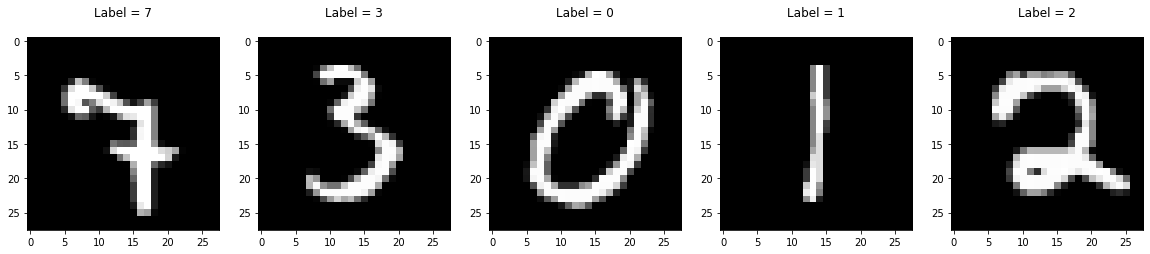

In [22]:
plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(np.reshape(train_img[i],(28,28)),cmap=plt.cm.gray)
  plt.title("Label = %i\n" % int(train_label[i]))
plt.show()

**Now we are done with processing our input data and now its time to train our model**

I'll be using the following machine learning techniques to perform the classification

> Logistic Regression with multi_class = 'ovr'

> Logistic Regression with multi_class = 'multinomial'

> Support Vector Machine

---


# **Logistic Regression (MultiNomial)**


In [0]:
logit = LogisticRegression(multi_class = 'multinomial')
logit.fit(train_img,train_label)

---

## Accuracy Metrics

In [0]:
predictions = logit.predict(test_img)

> **Confusion Matrix**

In [10]:
confusion_matrix(test_label,predictions)

array([[ 968,    0,    1,    1,    2,   10,    8,    2,    4,    0],
       [   0, 1115,    6,    2,    1,    4,    0,    4,    7,    2],
       [   4,   12,  933,   15,   12,    1,   15,    9,   35,    4],
       [   1,    5,   35,  892,    0,   25,    3,   12,   27,   13],
       [   1,    2,    5,    0,  898,    1,   11,   10,    6,   28],
       [   8,    2,    8,   31,    9,  746,   13,    5,   33,    8],
       [   8,    3,    8,    0,   11,   17,  936,    2,    4,    0],
       [   2,    5,   15,    4,   11,    2,    1,  980,    4,   40],
       [   4,   20,   11,   18,    7,   28,    9,    2,  854,   10],
       [   4,    4,    5,   10,   34,    8,    2,   32,    8,  862]])

> **Classification Report**

In [11]:
print (classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       996
           1       0.95      0.98      0.97      1141
           2       0.91      0.90      0.90      1040
           3       0.92      0.88      0.90      1013
           4       0.91      0.93      0.92       962
           5       0.89      0.86      0.88       863
           6       0.94      0.95      0.94       989
           7       0.93      0.92      0.92      1064
           8       0.87      0.89      0.88       963
           9       0.89      0.89      0.89       969

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



> **Model Accuracy**

In [12]:
logit.score(test_img,test_label)

0.9184

> **10-fold cross validation score on test data**

In [34]:
scores = cross_val_score(logit, test_img, test_label ,cv=10)
print ("Average 10-fold Score =",scores.mean())

Average 10-fold Score = 0.8734


---

# **Logistic Regression (OVR)**

In [0]:
logit2 = LogisticRegression(multi_class = 'ovr')
logit2.fit(train_img,train_label)

---

## Accuracy Metrics

In [0]:
predictions = logit2.predict(test_img)

> **Confusion Matrix**

In [26]:
confusion_matrix(test_label,predictions)

array([[ 971,    0,    2,    2,    1,    5,   10,    0,    5,    0],
       [   0, 1114,    6,    2,    1,    4,    3,    2,    8,    1],
       [   9,   13,  912,   22,   11,    2,   14,   11,   43,    3],
       [   4,    4,   43,  878,    0,   23,    3,   14,   27,   17],
       [   1,    2,    5,    1,  892,    1,    9,    6,   12,   33],
       [  10,    2,    5,   36,   11,  724,   20,    5,   40,   10],
       [   5,    2,   10,    0,    4,   17,  941,    1,    8,    1],
       [   5,    6,   21,    0,   14,    2,    1,  970,    7,   38],
       [   4,   17,   10,   25,    6,   22,    6,    6,  844,   23],
       [   3,    6,   10,   14,   37,    9,    1,   32,   10,  847]])

> **Classification Report**

In [27]:
print (classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       996
           1       0.96      0.98      0.97      1141
           2       0.89      0.88      0.88      1040
           3       0.90      0.87      0.88      1013
           4       0.91      0.93      0.92       962
           5       0.89      0.84      0.87       863
           6       0.93      0.95      0.94       989
           7       0.93      0.91      0.92      1064
           8       0.84      0.88      0.86       963
           9       0.87      0.87      0.87       969

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



> **Model Accuracy**

In [28]:
logit2.score(test_img,test_label)

0.9093

> **10-fold cross validation score for test data**

In [35]:
scores = cross_val_score(logit2, test_img, test_label, cv=10)
print ("Average 10-fold score =",scores.mean())

Average 10-fold score = 0.8595


---

# **Support Vector Machine (SVM)**

In [0]:
svmodel = svm.SVC()
svmodel.fit(train_img,train_label)

---

## Accuracy Metrics

In [0]:
predictions = svmodel.predict(test_img)

> **Confusion Matrix**

In [45]:
confusion_matrix(test_label,predictions)

array([[ 988,    0,    1,    0,    0,    3,    3,    0,    1,    0],
       [   0, 1134,    2,    0,    1,    0,    0,    2,    1,    1],
       [   1,    0, 1020,    2,    4,    0,    2,    5,    5,    1],
       [   0,    1,   11,  973,    0,    9,    0,    4,   13,    2],
       [   1,    1,    1,    0,  946,    1,    1,    4,    0,    7],
       [   0,    1,    3,    7,    1,  838,    7,    0,    5,    1],
       [   5,    0,    0,    0,    3,    5,  974,    0,    2,    0],
       [   1,    3,    7,    0,    9,    1,    1, 1033,    0,    9],
       [   0,    5,    3,    5,    2,    2,    3,    0,  937,    6],
       [   1,    1,    1,    4,   13,    4,    1,    9,    1,  934]])

> **Classification Report**

In [46]:
print(classification_report(test_label,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.99      0.99      0.99      1141
           2       0.97      0.98      0.98      1040
           3       0.98      0.96      0.97      1013
           4       0.97      0.98      0.97       962
           5       0.97      0.97      0.97       863
           6       0.98      0.98      0.98       989
           7       0.98      0.97      0.97      1064
           8       0.97      0.97      0.97       963
           9       0.97      0.96      0.97       969

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



> **Model Accuracy**

In [47]:
svmodel.score(test_img,test_label)

0.9777

In [48]:
scores = cross_val_score(svmodel, test_img, test_label, cv=10)
print ("Average 10-fold score =",scores.mean())

Average 10-fold score = 0.959


---

# **Conclusion**

We can conclude that out of the three models used, support vector machine was best among them. But still there were some missclassified images. Let's have a glimpse of them.

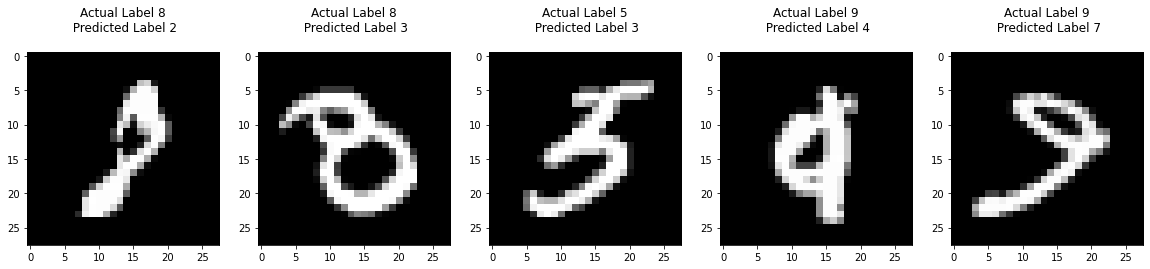

In [66]:
plt.figure(figsize = (20,4))
count=1
for i in range(len(predictions)):
  if (test_label[i]!=predictions[i]):
    plt.subplot(1,5,count)
    plt.imshow(np.reshape(test_img[i],(28,28)), cmap=plt.cm.gray)
    plt.title("Actual Label %i\n Predicted Label %i\n"%(int(test_label[i]),int(predictions[i])))
    count+=1
    if (count==6):
      break
plt.show()

------

---